In [23]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import ks_2samp
from scipy import stats
from config import connection
# connect to the database
engine = create_engine(connection) 
Base = automap_base()
Base.prepare(engine, schema='economy', reflect=True) 

# save classes as variables, prepare classes
job = Base.classes.job
company = Base.classes.company
state = Base.classes.state
# query our database (pull data and save into objects)
session = Session(engine) 

#Extract tables from Amazon RDS postgres database
job_table = session.query(job)
print(job_table) 
company_table = session.query(company) 
print(company_table) 
state_table = session.query(state)
print(state_table) 

# using the tables to create new pandas dataframe
job_df = pd.read_sql(job_table.statement, engine.connect())
print(job_df)
company_df = pd.read_sql(company_table.statement, engine.connect())
print(company_df)
state_df = pd.read_sql(state_table.statement, engine.connect())
print(state_df)


/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_35065/3576249463.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='economy', reflect=True)


SELECT economy.job.job_id AS economy_job_job_id, economy.job.avg_salary AS economy_job_avg_salary, economy.job.min_salary AS economy_job_min_salary, economy.job.max_salary AS economy_job_max_salary, economy.job.easy_apply AS economy_job_easy_apply, economy.job.company_id AS economy_job_company_id, economy.job.state_id AS economy_job_state_id 
FROM economy.job
SELECT economy.company.company_id AS economy_company_company_id, economy.company.state_id AS economy_company_state_id, economy.company.company_name AS economy_company_company_name, economy.company.rating AS economy_company_rating, economy.company.size AS economy_company_size, economy.company.headquarter AS economy_company_headquarter, economy.company.founded AS economy_company_founded, economy.company.type_of_ownership AS economy_company_type_of_ownership, economy.company.industry AS economy_company_industry, economy.company.sector AS economy_company_sector, economy.company.revenue AS economy_company_revenue 
FROM economy.company


In [24]:
sns.set ()



In [25]:
job_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job_id      4092 non-null   int64  
 1   avg_salary  4092 non-null   float64
 2   min_salary  3692 non-null   float64
 3   max_salary  3692 non-null   float64
 4   easy_apply  133 non-null    float64
 5   company_id  0 non-null      object 
 6   state_id    0 non-null      object 
dtypes: float64(4), int64(1), object(2)
memory usage: 223.9+ KB


In [26]:
job_df.columns

Index(['job_id', 'avg_salary', 'min_salary', 'max_salary', 'easy_apply',
       'company_id', 'state_id'],
      dtype='object')

In [27]:
job_df.describe()

,job_id,avg_salary,min_salary,max_salary,easy_apply
count,4092.00000,4092.000000,3692.000000,3692.000000,133.0
mean,2045.50000,95733.406647,56243.499458,98980.227519,1.0
std,1181.40298,45421.909703,20573.372102,32833.774913,0.0
min,0.00000,500.000000,27000.000000,48000.000000,1.0
25%,1022.75000,78500.000000,41000.000000,78000.000000,1.0
50%,2045.50000,91000.000000,49000.000000,87000.000000,1.0
75%,3068.25000,122000.000000,69000.000000,112000.000000,1.0
max,4091.00000,232000.000000,124000.000000,226000.000000,1.0


In [28]:
job_df = pd.read_csv('data/clean_data.csv')


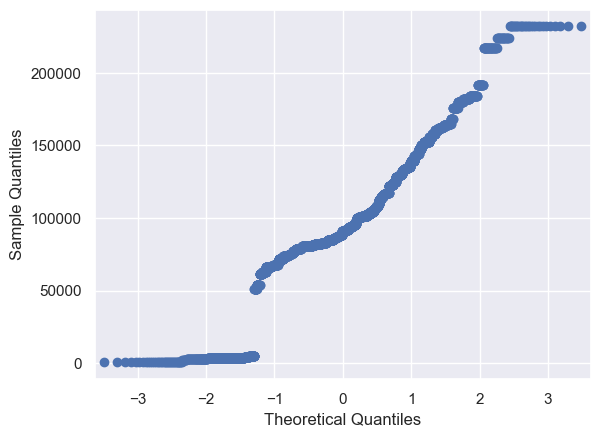

In [59]:
##QQ PLOT
import pandas as pd 
import statsmodels.api as sm 
import matplotlib as plt 
import numpy as np 
job_df = pd.read_csv('data/clean_data.csv')
fig=sm.qqplot(job_df["Avg_Salary"])
#plt.show()

<AxesSubplot: xlabel='count', ylabel='State'>

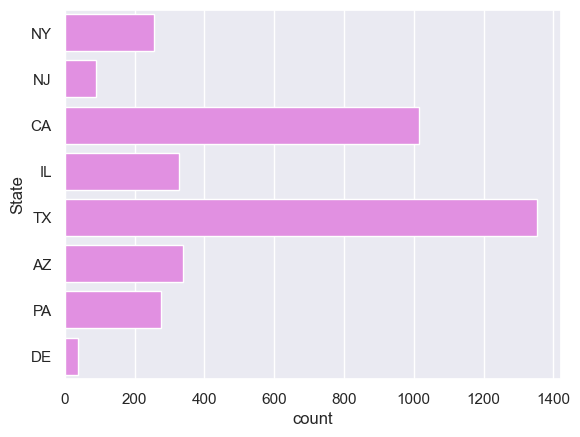

In [53]:
sns.countplot(y='State', color = 'violet' ,data= job_df)

<AxesSubplot: xlabel='State', ylabel='Max_Salary'>

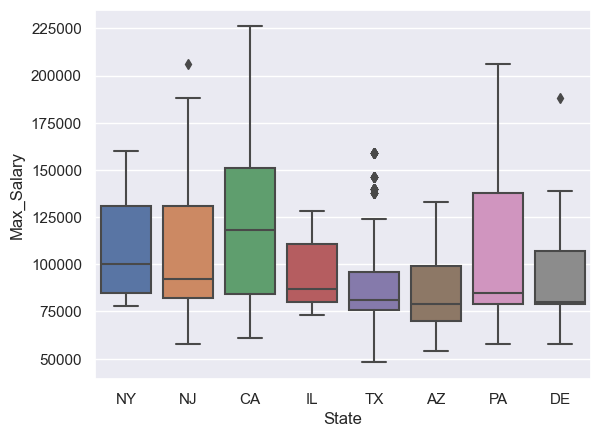

In [31]:
sns.boxplot(x= 'State', y= 'Max_Salary', data= job_df)

<AxesSubplot: xlabel='State', ylabel='Avg_Salary'>

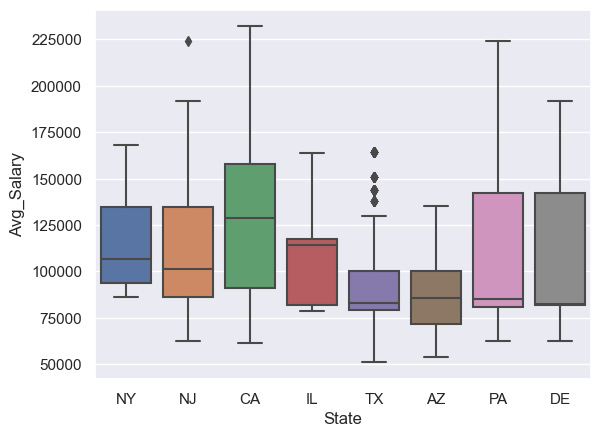

In [32]:
sns.boxplot(x= 'State', y= 'Avg_Salary', data= job_df)

<AxesSubplot: xlabel='State', ylabel='Min_Salary'>

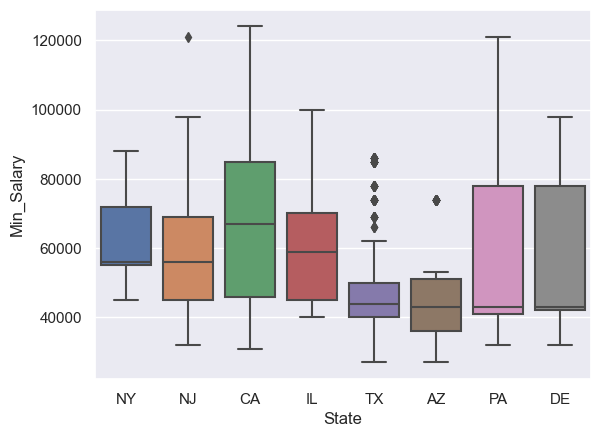

In [33]:
sns.boxplot(x= 'State', y= 'Min_Salary', data= job_df)

<AxesSubplot: xlabel='State', ylabel='Rating'>

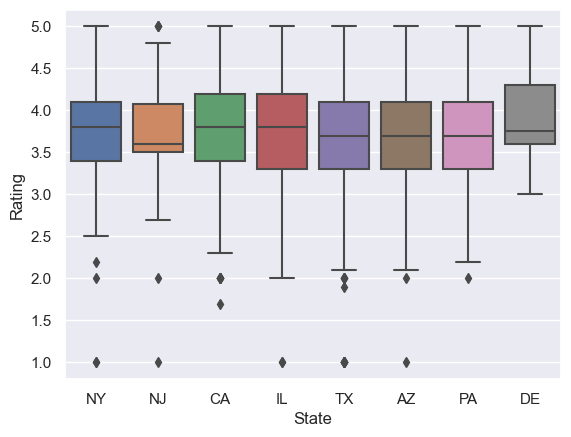

In [36]:
sns.boxplot(x= 'State', y= 'Rating', data= job_df)

<AxesSubplot: xlabel='count', ylabel='Sector'>

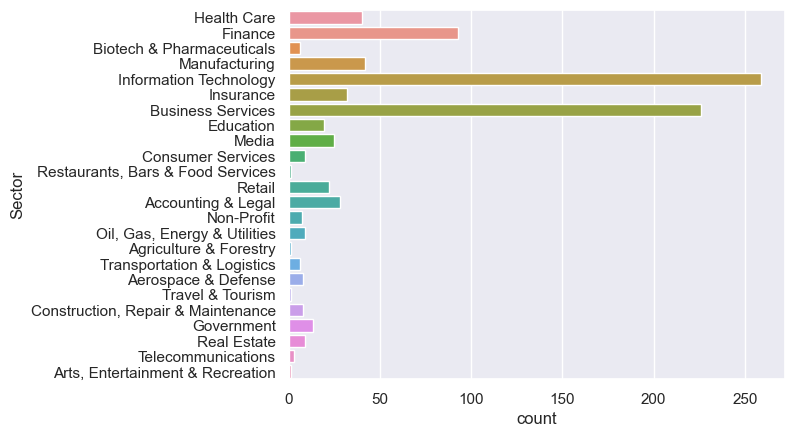

In [37]:
sns.countplot(y='Sector', data= job_df[:1000:])

<AxesSubplot: xlabel='State', ylabel='count'>

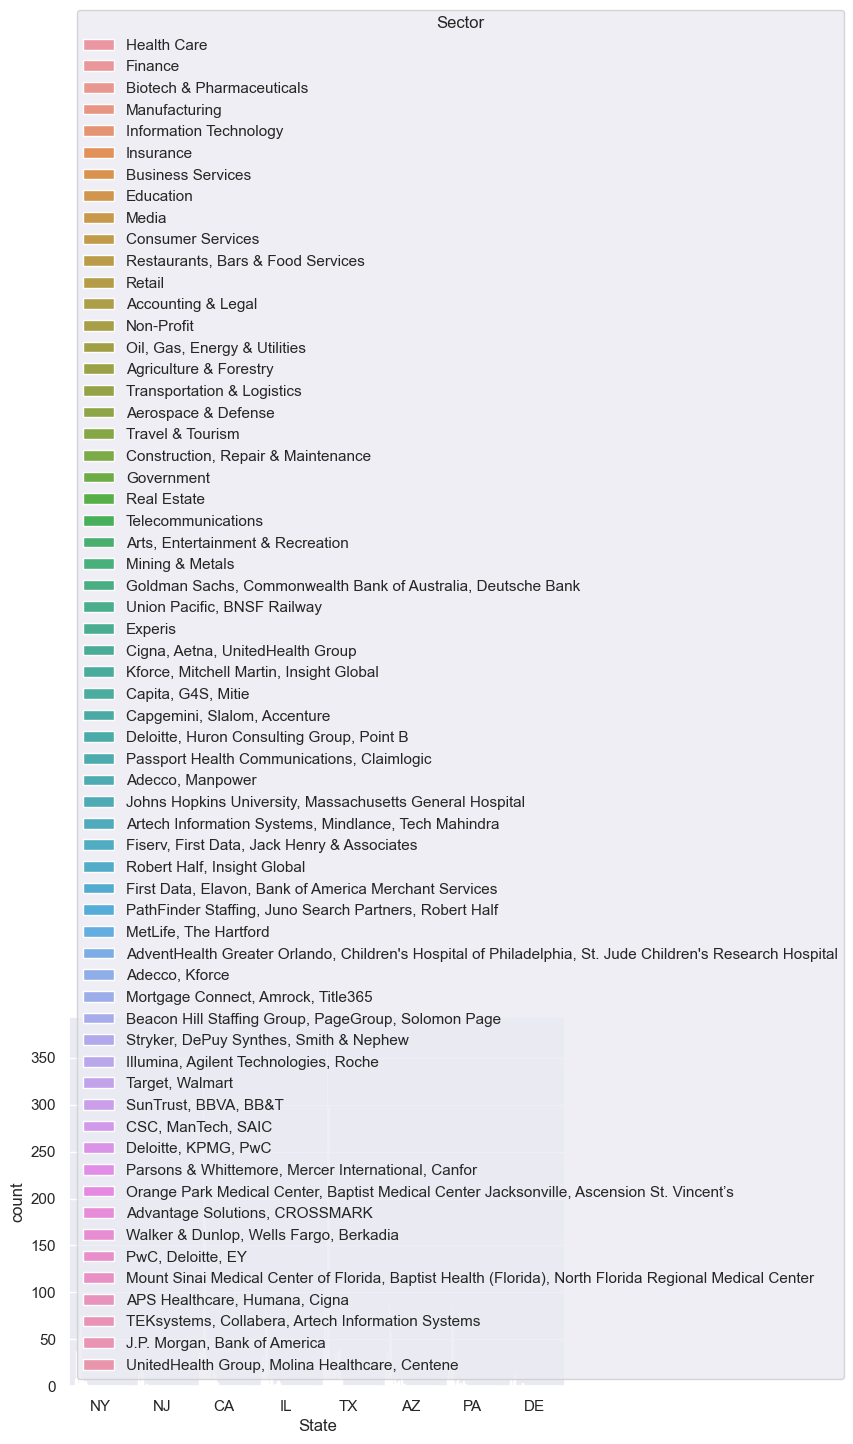

In [38]:
sns.countplot(x='State', hue='Sector', data=job_df)

<AxesSubplot: xlabel='Avg_Salary', ylabel='Count'>

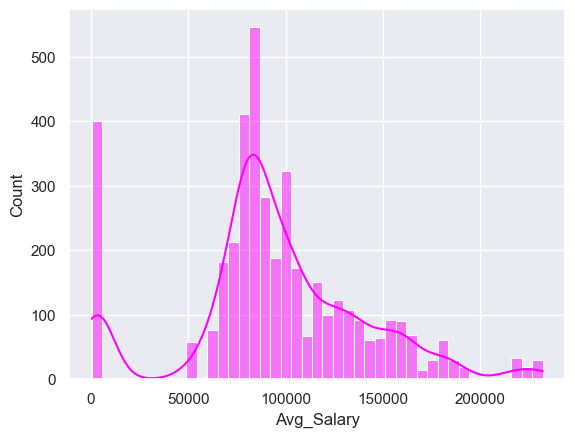

In [51]:
sns.histplot(job_df['Avg_Salary'], color ='magenta', kde= True)

<AxesSubplot: xlabel='Max_Salary', ylabel='Count'>

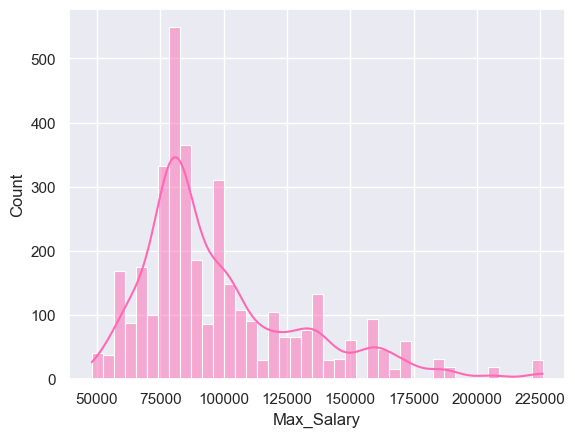

In [54]:

sns.histplot(job_df['Max_Salary'], color = '#FF69B4',kde= True) 




